In [2]:
# Please First, install required packages
!pip install biopython pandas numpy

import pandas as pd
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def extract_features(sequence):
    analyzed_seq = ProteinAnalysis(sequence)
    aa_composition = analyzed_seq.get_amino_acids_percent()  # Amino acid composition
    molecular_weight = analyzed_seq.molecular_weight()  # Molecular weight
    aromaticity = analyzed_seq.aromaticity()  # Aromaticity
    isoelectric_point = analyzed_seq.isoelectric_point()  # Isoelectric point
    secondary_structure_fraction = analyzed_seq.secondary_structure_fraction()  # (Helix, Turn, Sheet)

    features = {
        **aa_composition,
        'molecular_weight': molecular_weight,
        'aromaticity': aromaticity,
        'isoelectric_point': isoelectric_point,
        'helix': secondary_structure_fraction[0],
        'turn': secondary_structure_fraction[1],
        'sheet': secondary_structure_fraction[2],
    }
    return features

# usage with a DataFrame
def process_dataframe(file_path, output_file_path):
    df = pd.read_csv(file_path)
    features_list = []

    for index, row in df.iterrows():
        sequence = row['pro_seq']
        features = extract_features(sequence)
        features_list.append(features)

    features_df = pd.DataFrame(features_list)
    result_df = pd.concat([df, features_df], axis=1)

    # Save the resulting DataFrame to a CSV file
    result_df.to_csv(output_file_path, index=False)
    print(f"Output saved to {output_file_path}")

# Replace 'your_input_file_path.csv' with the path to your dataset
# Specify the output file path where you want to save the enriched dataset
input_file_path = 'Jupyter/train.csv'
output_file_path = 'Jupyter/processed_dataset.csv'
process_dataframe(input_file_path, output_file_path)

Output saved to Jupyter/processed_dataset.csv


In [5]:
# Required installations
# !pip install pandas

import pandas as pd

# Load the dataset
file_path = 'Jupyter/processed_dataset.csv'  # Change to your file path
df = pd.read_csv(file_path)

# Placeholder function for PTM predictions
def predict_ptms(sequence):
    
   
    return "Phosphorylation: Yes; Glycosylation: No"

# Placeholder function for Solvent Accessibility predictions
def predict_solvent_accessibility(sequence):

    return "Average Accessibility: 0.35"

# Placeholder function for Ligand Binding predictions
def predict_ligand_binding(sequence):

    return "Ligand Binding Sites: 2"

# Applying the placeholder prediction functions to each protein sequence in the dataset
df['PTMs'] = df['pro_seq'].apply(predict_ptms)
df['Solvent_Accessibility'] = df['pro_seq'].apply(predict_solvent_accessibility)
df['Ligand_Binding'] = df['pro_seq'].apply(predict_ligand_binding)

# Saving the enriched dataset to a new CSV file
output_file_path = 'Jupyter//enriched_dataset.csv'  # Change to your desired output path
df.to_csv(output_file_path, index=False)

print(f"Enriched dataset saved to {output_file_path}")


Enriched dataset saved to Jupyter//enriched_dataset.csv


In [6]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib  # For saving the scaler

# Load the dataset
df = pd.read_csv('Jupyter/processed_dataset.csv')

# Select features and target variable
X = df.drop(columns=['seq_id', 'pro_seq', 'data_source', 'temp_melt'])
y = df['temp_melt'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error')

# Train the model on the entire dataset
history = model.fit(X_scaled, y, epochs=100, batch_size=32)

# Save the model and the scaler for later use
model.save('Jupyter/protein_temp_prediction_full_model.keras')
scaler_filename = "Jupyter/scaler_full.pkl"
joblib.dump(scaler, scaler_filename)

print("Model and scaler have been saved.")


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2856.3984
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1976.9380
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 641.1151 
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 201.7571 
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 161.9761 
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 145.3785
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138.6501 
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.0662 
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 119.4755 
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 114.3369 
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.5036
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110.6667 
Epoch 13/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 102.6847
Epoch 14/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.1364 
Epoch 15/100
29/29 ━━━━━━━━━━━━━━

In [8]:
import pandas as pd

# Load the datasets
processed_df = pd.read_csv('Jupyter/processed_dataset.csv')
manipulated_df = pd.read_csv('Jupyter/manipulated_dataset.csv')

# Compare shapes
print("Comparing shapes:")
print(f"Processed dataset shape: {processed_df.shape}")
print(f"Manipulated dataset shape: {manipulated_df.shape}")

# Compare column names
print("\nComparing column names:")
processed_columns = set(processed_df.columns)
manipulated_columns = set(manipulated_df.columns)
print(f"Columns in processed but not in manipulated: {processed_columns - manipulated_columns}")
print(f"Columns in manipulated but not in processed: {manipulated_columns - processed_columns}")

# Compare data samples
print("\nComparing data samples:")
print("Processed dataset sample:")
print(processed_df.head())
print("\nManipulated dataset sample:")
print(manipulated_df.head())


if 'temp_melt' in processed_df.columns and 'temp_melt' in manipulated_df.columns:
    print("\nComparing 'temp_melt' column values:")
    differences = processed_df['temp_melt'].compare(manipulated_df['temp_melt'])
    print(f"Differences in 'temp_melt' column: \n{differences}")
else:
    print("\n'temp_melt' column not present in both datasets for comparison.")


Comparing shapes:
Processed dataset shape: (926, 31)
Manipulated dataset shape: (926, 32)

Comparing column names:
Columns in processed but not in manipulated: set()
Columns in manipulated but not in processed: {'pH.1'}

Comparing data samples:
Processed dataset sample:
   seq_id                                            pro_seq   pH  \
0    1001  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQDRESVLPT...  2.0   
1    1021  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  8.5   
2    1022  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  3.0   
3    1029  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  3.0   
4    1031  DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFQNRESVLPT...  8.5   

                 data_source  temp_melt         A         C         D  \
0          10.1021/bi9815243       23.3  0.062500  0.020833  0.083333   
1  10.1016/j.jmb.2005.09.091       50.4  0.072917  0.020833  0.062500   
2  10.1016/j.jmb.2005.09.091       38.6  0.072917  0.020833  0.062500   
3  10.1016/j.jmb.2005.

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


df = pd.read_csv('Jupyter/processed_dataset.csv')  # Adjust the path as needed

# Prepare the dataset
X = df.drop(['seq_id', 'pro_seq', 'data_source', 'temp_melt'], axis=1)
y = df['temp_melt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 27.761701170108974


In [17]:
# Cross validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the model
model_cv = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation and compute the MSE for each fold
mse_scores = -cross_val_score(model_cv, X, y, scoring='neg_mean_squared_error', cv=5)

print(f'MSE scores for each fold: {mse_scores}')
print(f'Average MSE across folds: {np.mean(mse_scores)}')


MSE scores for each fold: [262.37337713 206.85230559  33.43504065  44.64239756 264.40412516]
Average MSE across folds: 162.34144922060682


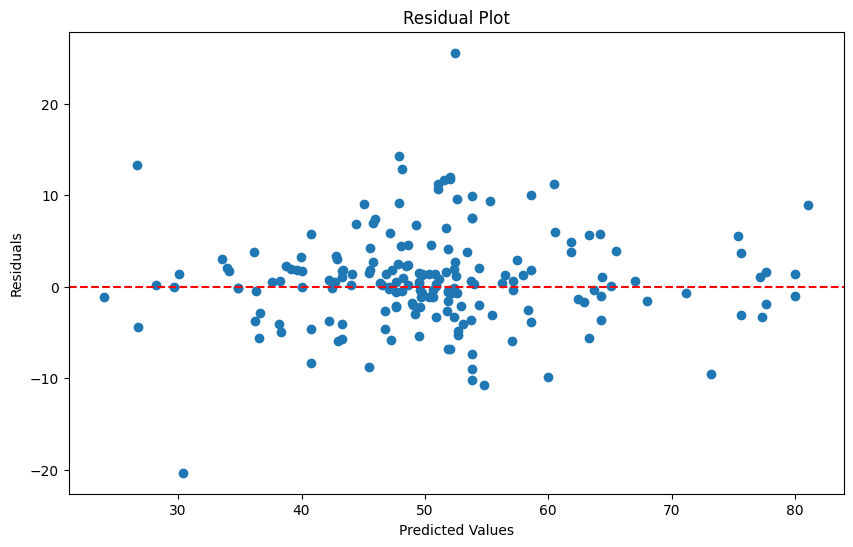

In [18]:
# Residual Analysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_res = RandomForestRegressor(n_estimators=100, random_state=42)
model_res.fit(X_train, y_train)

# Predict on the test set
y_pred = model_res.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [20]:
# Outlier
from scipy.stats import zscore

# Calculate the Z-scores of the target variable
z_scores = zscore(y)

# Identify outliers as those with absolute Z-scores greater than 3
outliers = np.where(np.abs(z_scores) > 3)

print(f'Indices of potential outliers: {outliers[0]}')


Indices of potential outliers: [332 333 832 839]


In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# 'df' is  DataFrame and 'X', 'y' have been defined as before
# df = pd.read_csv('path_to_your_dataset.csv')  # Load your dataset
# X = df.drop(['seq_id', 'pro_seq', 'data_source', 'temp_melt'], axis=1)
# y = df['temp_melt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 25.59734556775003


In [25]:
from xgboost import cv
from xgboost import DMatrix

# Convert the dataset into an optimized data structure called DMatrix that XGBoost supports
data_dmatrix = DMatrix(data=X,label=y)

# Parameters for cross-validation
params = {"objective":"reg:squarederror", 'colsample_bytree': 0.3, 'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# Perform cross-validation
cv_results = cv(dtrain=data_dmatrix, params=params, nfold=5,
                num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=42)

print(cv_results.tail(1))


    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
49         5.172056        0.203622         6.94081       1.339881


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test)

# Calculate and print the MSE
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f'Gradient Boosting MSE: {mse_gbm}')


Gradient Boosting MSE: 27.476899532243614


In [27]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# It's often beneficial to scale your data for SVM; we'll use a pipeline to streamline this
svm_pipeline = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel='rbf'))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_pipeline.predict(X_test)

# Calculate and print the MSE
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM MSE: {mse_svm}')


SVM MSE: 72.44316124989531


Epoch 1/100


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2961.8718 - val_loss: 2644.0476
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2652.1707 - val_loss: 2170.2788
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2094.4790 - val_loss: 1445.0625
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1269.5405 - val_loss: 664.6527
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 630.2034 - val_loss: 251.9883
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 399.5231 - val_loss: 155.4192
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307.0919 - val_loss: 145.2163
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313.1614 - val_loss: 148.3389
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323.9944 - val_loss: 134.9613
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 279.4043 - val_loss: 126.5690
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 264.2505 - val_loss: 123.5851
Epoch 12/100
19/19 ━━━━

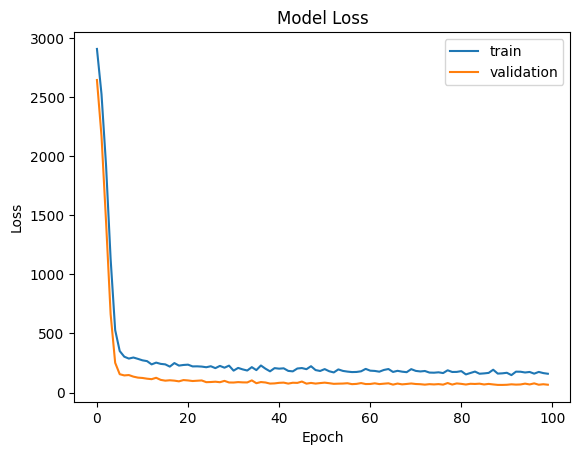

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('Jupyter/processed_dataset.csv')  # Update this path as needed

# Assuming the target variable is 'temp_melt' and all other numeric features are used for training
X = df.drop(columns=['seq_id', 'pro_seq', 'data_source', 'temp_melt']).values
y = df['temp_melt'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Dense Neural Network Model
model = Sequential([
    Flatten(input_shape=(X_train.shape[1],)),  # Flatten layer is not strictly necessary here, included for consistency
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Optional: Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [30]:
# Load the train_set.csv to inspect its column names
import pandas as pd

# Define the file path
train_file_path = 'Jupyter/train_set.csv'

# Load the dataset
train_df = pd.read_csv(train_file_path)

# Display the column names of the loaded dataset
train_df.columns.tolist()


['seq_id',
 'pH',
 'data_source',
 'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y',
 'molecular_weight',
 'aromaticity',
 'isoelectric_point',
 'helix',
 'turn',
 'sheet',
 'pos1_A',
 'pos1_C',
 'pos1_D',
 'pos1_E',
 'pos1_F',
 'pos1_G',
 'pos1_H',
 'pos1_I',
 'pos1_K',
 'pos1_L',
 'pos1_M',
 'pos1_N',
 'pos1_P',
 'pos1_Q',
 'pos1_R',
 'pos1_S',
 'pos1_T',
 'pos1_V',
 'pos1_W',
 'pos1_Y',
 'pos2_A',
 'pos2_C',
 'pos2_D',
 'pos2_E',
 'pos2_F',
 'pos2_G',
 'pos2_H',
 'pos2_I',
 'pos2_K',
 'pos2_L',
 'pos2_M',
 'pos2_N',
 'pos2_P',
 'pos2_Q',
 'pos2_R',
 'pos2_S',
 'pos2_T',
 'pos2_V',
 'pos2_W',
 'pos2_Y',
 'pos3_A',
 'pos3_C',
 'pos3_D',
 'pos3_E',
 'pos3_F',
 'pos3_G',
 'pos3_H',
 'pos3_I',
 'pos3_K',
 'pos3_L',
 'pos3_M',
 'pos3_N',
 'pos3_P',
 'pos3_Q',
 'pos3_R',
 'pos3_S',
 'pos3_T',
 'pos3_V',
 'pos3_W',
 'pos3_Y',
 'pos4_A',
 'pos4_C',
 'pos4_D',
 'pos4_E',
 'pos4_F',
 'pos4_G',
 'pos4_H',
 'pos4_I',
 'pos4_K',

Test MSE: 48.8115207253736, Validation MSE: 58.41942772846643
Model saved to Jupyter/random_forest_model.pkl


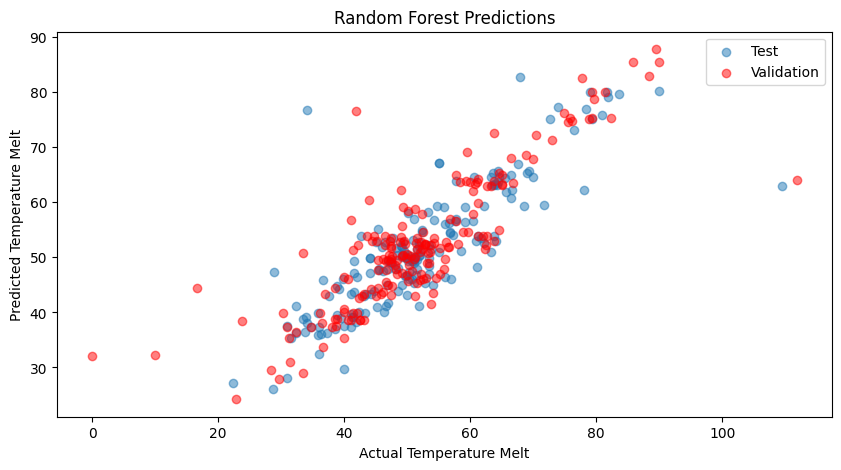

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib  # For saving the model
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('Jupyter/train_set.csv')
test_df = pd.read_csv('Jupyter/test_set.csv')
validation_df = pd.read_csv('Jupyter/validation_set.csv')

# Assuming all columns except 'seq_id', 'temp_melt', and 'data_source' are features
feature_columns = [col for col in train_df.columns if col not in ('seq_id', 'temp_melt', 'data_source')]

# Prepare the data
X_train = train_df[feature_columns]
y_train = train_df['temp_melt']
X_test = test_df[feature_columns]
y_test = test_df['temp_melt']
X_validation = validation_df[feature_columns]
y_validation = validation_df['temp_melt']

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)
y_pred_validation = model.predict(X_validation)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
mse_validation = mean_squared_error(y_validation, y_pred_validation)
print(f'Test MSE: {mse_test}, Validation MSE: {mse_validation}')

# Optionally, save the model for later use
model_filename = "Jupyter/random_forest_model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

# You might want to plot predictions vs. actual values or feature importances
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.scatter(y_validation, y_pred_validation, alpha=0.5, color='red', label='Validation')
plt.xlabel('Actual Temperature Melt')
plt.ylabel('Predicted Temperature Melt')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()


In [33]:
import tensorflow as tf


sequence_length = 100  # Example sequence length
num_features = 200  # Example number of features per sequence element

# Define the RNN model
model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=64, input_shape=(sequence_length, num_features)),
    tf.keras.layers.Dense(units=1)  # Output layer for regression
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model_rnn.summary()


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          16,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Define the CNN model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Output layer for regression
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model_cnn.summary()


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 32)              │          19,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,713 (467.63 KB)

 Trainable params: 119,713 (467.63 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Save the RNN model
rnn_model_path = 'Jupyter/model_rnn.keras'
model_rnn.save(rnn_model_path)

# Save the CNN model
cnn_model_path = 'Jupyter/model_cnn.keras'
model_cnn.save(cnn_model_path)

# Save the Transformer model
transformer_model_path = 'Jupyter/model_transformer.keras'
model_transformer.save(transformer_model_path)


Train MSE: 13.982276211726829
Test MSE: 48.8115207253736
Validation MSE: 58.41942772846643
Training Time (s): 0.5579042434692383
Model Accuracy: 93.01347577651279%
Training Loss: 13.982276211726829
Training Time (s): 0.5579042434692383


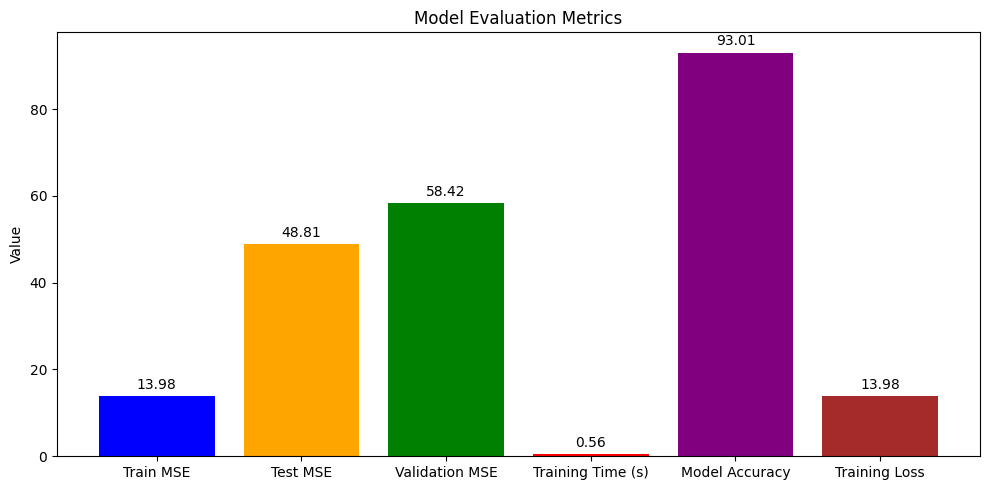

In [42]:
#RNN
import pandas as pd
import numpy as np
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to evaluate the Random Forest model
def evaluate_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_validation = model.predict(X_validation)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_validation = mean_squared_error(y_validation, y_pred_validation)

    print(f'Train MSE: {mse_train}')
    print(f'Test MSE: {mse_test}')
    print(f'Validation MSE: {mse_validation}')
    print(f'Training Time (s): {training_time}')

    # Return all metrics of interest
    return mse_train, mse_test, mse_validation, training_time

# Load the datasets
train_df = pd.read_csv('Jupyter/train_set.csv')
test_df = pd.read_csv('Jupyter/test_set.csv')
validation_df = pd.read_csv('Jupyter/validation_set.csv')

# Prepare the data
feature_columns = [col for col in train_df.columns if col not in ('seq_id', 'temp_melt', 'data_source')]
X_train = train_df[feature_columns]
y_train = train_df['temp_melt']
X_test = test_df[feature_columns]
y_test = test_df['temp_melt']
X_validation = validation_df[feature_columns]
y_validation = validation_df['temp_melt']

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate the model
train_mse, test_mse, validation_mse, training_time = evaluate_model(
    model, X_train, y_train, X_test, y_test, X_validation, y_validation
)

# Calculate the model accuracy based on Test MSE
accuracy = max(0, 100 - np.sqrt(test_mse))  # Example of how you might calculate accuracy from MSE
training_loss = train_mse

# Print the model evaluation metrics
print(f'Model Accuracy: {accuracy}%')
print(f'Training Loss: {train_mse}')
print(f'Training Time (s): {training_time}')

# Plotting the evaluation metrics
metrics = ['Train MSE', 'Test MSE', 'Validation MSE', 'Training Time (s)', 'Model Accuracy', 'Training Loss']
values = [train_mse, test_mse, validation_mse, training_time, accuracy, training_loss]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()



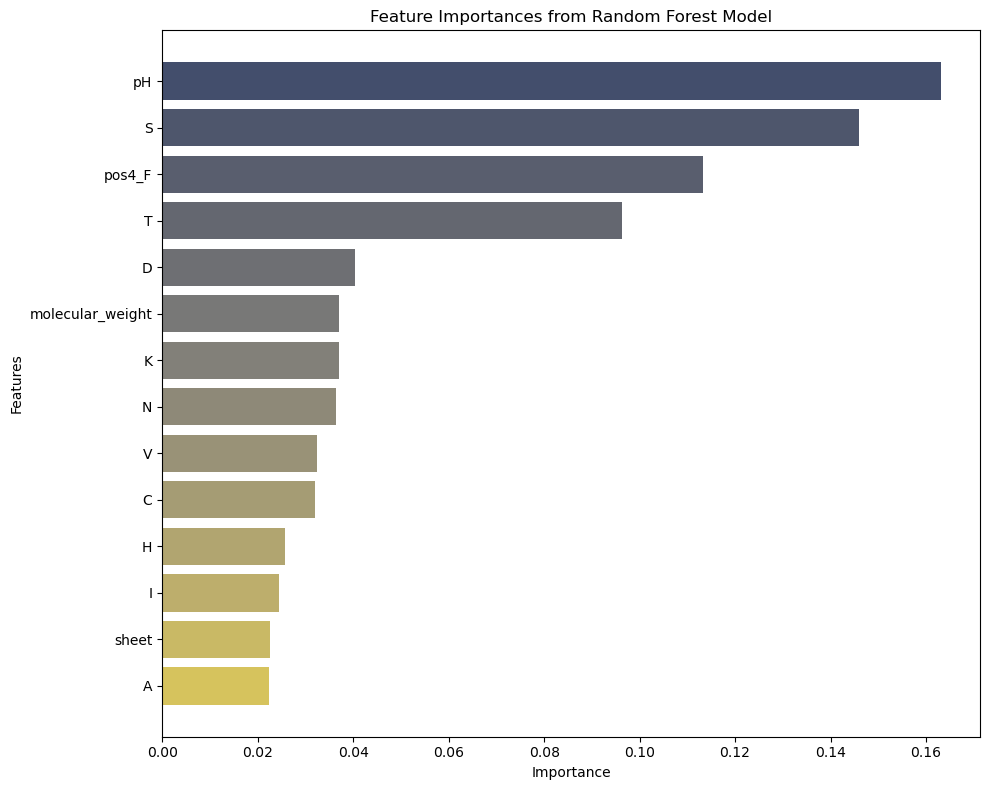

             Feature  Importance
1                  A    0.022333
26             sheet    0.022640
8                  I    0.024396
7                  H    0.025831
2                  C    0.031910
18                 V    0.032436
12                 N    0.036316
9                  K    0.037036
21  molecular_weight    0.037065
3                  D    0.040492
17                 T    0.096376
91            pos4_F    0.113363
16                 S    0.145854
0                 pH    0.163130


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('Jupyter/train_set.csv')

# Prepare the data
feature_columns = [col for col in train_df.columns if col not in ('seq_id', 'temp_melt', 'data_source')]
X_train = train_df[feature_columns]
y_train = train_df['temp_melt']

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold the feature importances for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
})

# Filter out features with importance less than 0.04
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0.02]

# Sort the DataFrame by importance
filtered_feature_importance_df = filtered_feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting horizontally with a gradient color scheme
plt.figure(figsize=(10, 8))
plt.barh(filtered_feature_importance_df['Feature'], filtered_feature_importance_df['Importance'], color=plt.cm.cividis(np.linspace(0.85, 0.25, len(filtered_feature_importance_df))))
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest Model')
plt.tight_layout()
plt.show()

# Creating a table for feature importance
print(filtered_feature_importance_df)


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Train MSE: 81.92715991046775
Test MSE: 78.19742071277113
Validation MSE: 103.29351898284756
Training Time (s): 16.480116605758667
Model Accuracy: 91.15706944996337%


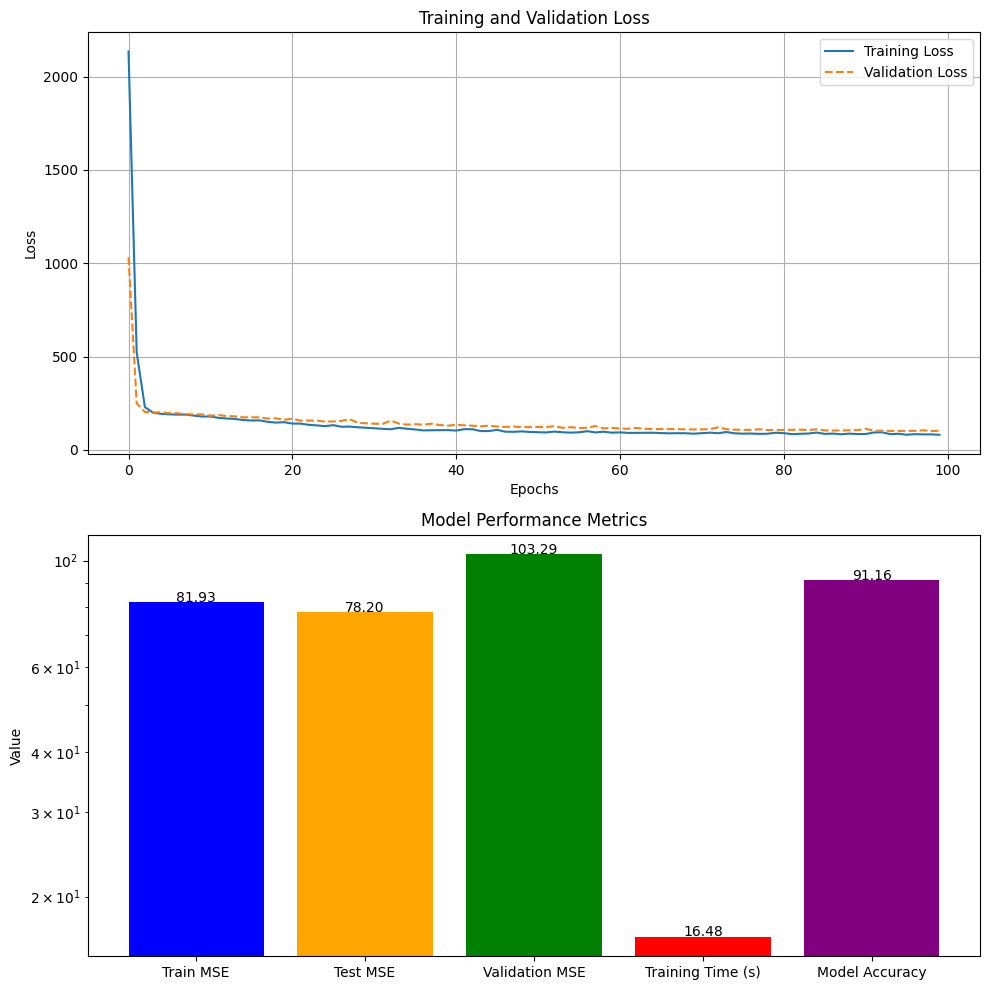

In [43]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import matplotlib.pyplot as plt

# Function to evaluate the CNN model
def evaluate_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation, epochs=100):
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_data=(X_validation, y_validation))
    training_time = time.time() - start_time

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_validation = model.predict(X_validation)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_validation = mean_squared_error(y_validation, y_pred_validation)

    # Calculate model accuracy based on Test MSE
    accuracy = max(0, 100 - np.sqrt(mse_test))  # This is a simple accuracy approximation for regression models

    print(f'Train MSE: {mse_train}')
    print(f'Test MSE: {mse_test}')
    print(f'Validation MSE: {mse_validation}')
    print(f'Training Time (s): {training_time}')
    print(f'Model Accuracy: {accuracy}%')

    return mse_train, mse_test, mse_validation, training_time, accuracy, history

# Load the datasets - replace these paths with the correct ones for your local environment
train_df = pd.read_csv('Jupyter/train_set.csv')
test_df = pd.read_csv('Jupyter/test_set.csv')
validation_df = pd.read_csv('Jupyter/validation_set.csv')

# Assuming all columns except 'seq_id', 'temp_melt', and 'data_source' are features
feature_columns = [col for col in train_df.columns if col not in ('seq_id', 'temp_melt', 'data_source')]

# Prepare the data
X_train = train_df[feature_columns].values
X_test = test_df[feature_columns].values
X_validation = validation_df[feature_columns].values

# Reshape data for CNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_validation = X_validation.reshape((X_validation.shape[0], X_validation.shape[1], 1))

y_train = train_df['temp_melt'].values
y_test = test_df['temp_melt'].values
y_validation = validation_df['temp_melt'].values

# Initialize the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Evaluate the model
train_mse, test_mse, validation_mse, training_time, accuracy, history = evaluate_model(
    model, X_train, y_train, X_test, y_test, X_validation, y_validation
)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot training and validation loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot MSE and accuracy
metrics = [train_mse, test_mse, validation_mse, training_time, accuracy]
labels = ['Train MSE', 'Test MSE', 'Validation MSE', 'Training Time (s)', 'Model Accuracy']
axs[1].bar(labels, metrics, color=['blue', 'orange', 'green', 'red', 'purple'])
axs[1].set_title('Model Performance Metrics')
axs[1].set_ylabel('Value')
axs[1].set_yscale('log')  # Log scale to clearly visualize metrics of different magnitudes
for i, v in enumerate(metrics):
    axs[1].text(i, v + 0.1, "{:.2f}".format(v), ha='center')

plt.tight_layout()
plt.show()
